<a href="https://colab.research.google.com/github/Yuni-va/heart-disease-prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


Load Dataset

In [3]:
df = pd.read_csv("/content/sample_data/Heart_Disease_Prediction.csv")

print("Jumlah data:", df.shape)
df.head()


Jumlah data: (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Data Undestanding

In [4]:
# Info dataset
df.info()

# Cek missing value
print("\nMissing Value:")
print(df.isnull().sum())

# Distribusi target
print("\nDistribusi Target:")
print(df['Heart Disease'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Analisis Statistik

In [5]:
df.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Visualisasi Data

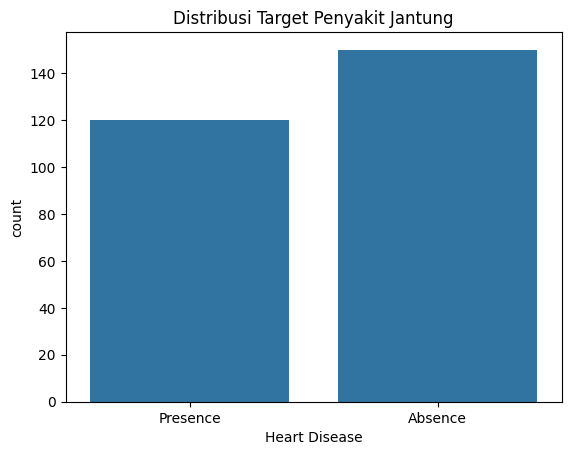

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Heart Disease', data=df)
plt.title("Distribusi Target Penyakit Jantung")
plt.show()


Heatmap Korelasi

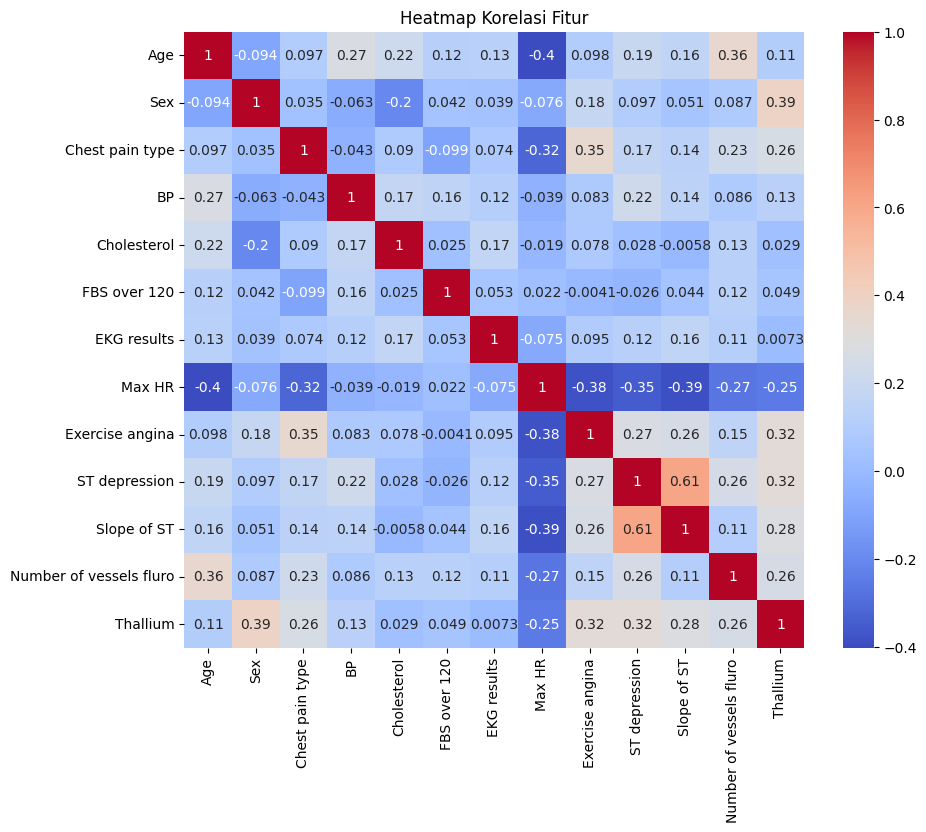

In [8]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()


Preprocessing

In [9]:
# Pisahkan fitur dan target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Scaling fitur numerik
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Split Data Train & Test

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data train:", X_train.shape)
print("Jumlah data test :", X_test.shape)


Jumlah data train: (216, 13)
Jumlah data test : (54, 13)


Training Model

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Evaluasi Model

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Tabel Perbandingan Model (HASIL EKSPERIMEN)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "KNN": knn,
    "Random Forest": rf,
    "SVM": svm
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary', pos_label='Presence', zero_division=0)
    rec = recall_score(y_test, y_pred, average='binary', pos_label='Presence', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', pos_label='Presence', zero_division=0)

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(
    results,
    columns=["Algoritma", "Accuracy", "Precision", "Recall", "F1-Score"]
)

results_df

,Algoritma,Accuracy,Precision,Recall,F1-Score
0,KNN,0.796296,0.724138,0.875000,0.792453
1,Random Forest,0.814815,0.769231,0.833333,0.800000
2,SVM,0.814815,0.769231,0.833333,0.800000
